il primo deve visualizzare, per ogni regione, il numero di vaccinati (prima dose) e il numero totale di abitanti di quella regione

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,prima_dose,seconda_dose,pregressa_infezione,dose_addizionale_booster,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,1,2,0,0,0,ITF,ITF1,13,Abruzzo
1,2020-12-27,Pfizer/BioNTech,ABR,30-39,1,4,5,0,0,0,ITF,ITF1,13,Abruzzo
2,2020-12-27,Pfizer/BioNTech,ABR,40-49,1,8,9,0,0,0,ITF,ITF1,13,Abruzzo
3,2020-12-27,Pfizer/BioNTech,ABR,50-59,7,6,13,0,0,0,ITF,ITF1,13,Abruzzo
4,2020-12-27,Pfizer/BioNTech,ABR,60-69,12,4,16,0,0,0,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156328,2021-11-30,Pfizer/BioNTech,VEN,60-69,3012,3282,119,88,1,6086,ITH,ITH3,5,Veneto
156329,2021-11-30,Pfizer/BioNTech,VEN,70-79,2644,2826,47,51,0,5372,ITH,ITH3,5,Veneto
156330,2021-11-30,Pfizer/BioNTech,VEN,80-89,1325,1891,11,27,0,3178,ITH,ITH3,5,Veneto
156331,2021-11-30,Pfizer/BioNTech,VEN,90+,169,476,6,18,0,621,ITH,ITH3,5,Veneto


In [ ]:
dfn1 = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
dfn1

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


In [ ]:
df1 = df.groupby('area',as_index=False).sum()[['area','prima_dose',]]
df1

,area,prima_dose
0,ABR,985348
1,BAS,426595
2,CAL,1366918
3,CAM,4198537
4,EMR,3457429
5,FVG,895142
6,LAZ,4515320
7,LIG,1176474
8,LOM,7944305
9,MAR,1124316


In [ ]:
dfn2 = dfn1.groupby('nome_area',as_index=False).sum()[['nome_area','totale_popolazione']]
dfn2

,nome_area,totale_popolazione
0,Abruzzo,1188922
1,Basilicata,494881
2,Calabria,1689716
3,Campania,5104347
4,Emilia-Romagna,3998406
5,Friuli-Venezia Giulia,1088152
6,Lazio,5147533
7,Liguria,1399466
8,Lombardia,9246804
9,Marche,1366477


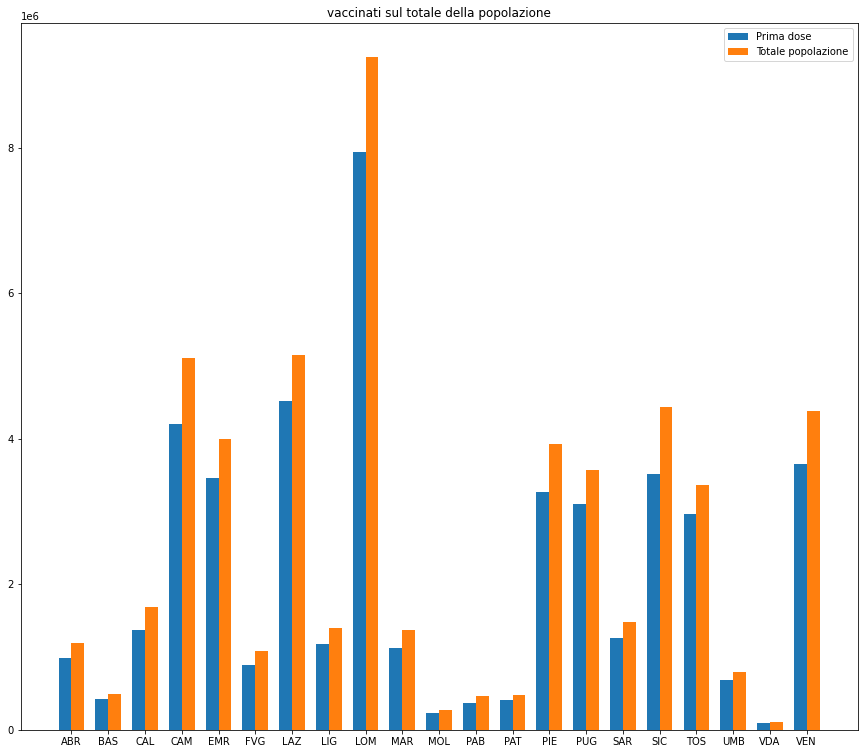

In [ ]:
import numpy as np

fig = plt.figure(figsize=(15,13))
ax = plt.axes()

x = np.arange(len(df1['area'])) 
width = 0.35

ax.bar(x - width / 2,df1['prima_dose'],width,label="Prima dose")
ax.bar(x + width / 2,dfn2['totale_popolazione'],width,label="Totale popolazione")

ax.set_xticks(x)
ax.set_xticklabels(df1['area'])
ax.legend()
plt.title('vaccinati sul totale della popolazione')
plt.show()

il secondo deve contenere le percentuali di vaccinazioni (prima dose) sul totale dei vaccinati

In [ ]:
df1['percentuale'] = df1['prima_dose']/dfn2['totale_popolazione']*100
df1

,area,prima_dose,percentuale
0,ABR,985348,82.877430
1,BAS,426595,86.201531
2,CAL,1366918,80.896316
3,CAM,4198537,82.254145
4,EMR,3457429,86.470183
5,FVG,895142,82.262588
6,LAZ,4515320,87.718136
7,LIG,1176474,84.065922
8,LOM,7944305,85.914063
9,MAR,1124316,82.278443
